# 1. Import required libraries and read the dataset.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [26]:
df = pd.read_csv('dataset.csv')

# 2. Check the first few samples, shape, info of the data and try to familiarize with different features.

In [27]:
print(df.head())
print(df.shape)
print(df.info())

    loan_id gender married dependents     education self_employed  \
0  lp001002   male      no          0      graduate            no   
1  lp001003   male     yes          1      graduate            no   
2  lp001005   male     yes          0      graduate           yes   
3  lp001006   male     yes          0  not graduate            no   
4  lp001008   male      no          0      graduate            no   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   credit_history property_area loan_status  
0             1.0         urban           y  
1             1.0         rural           n  
2             1.0   

# 3. Check for missing values and handle them

In [30]:
print(df.isnull().sum())

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


## Fill numeric columns with median

In [32]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

## Fill categorical columns with mode

In [34]:
categorical_columns = df.select_dtypes(include=[object]).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# 4. Visualize the distribution of the target column

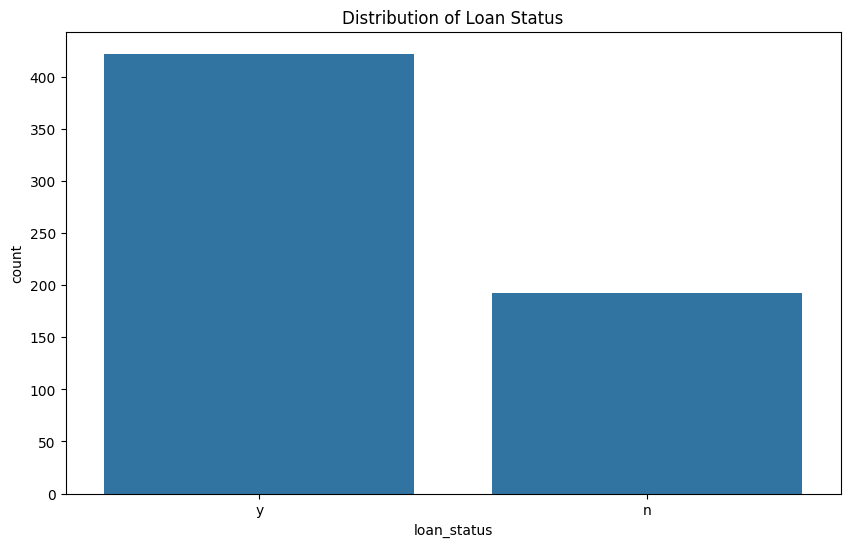

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

## Visualize categorical features

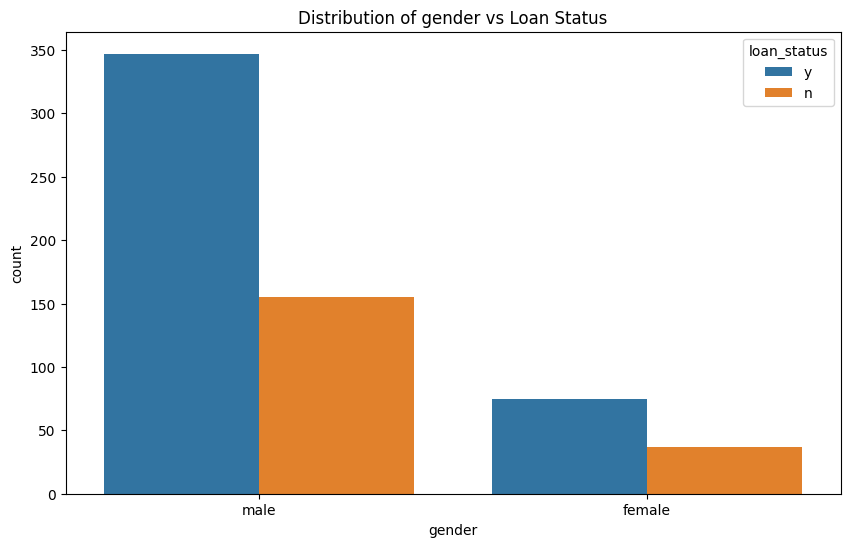

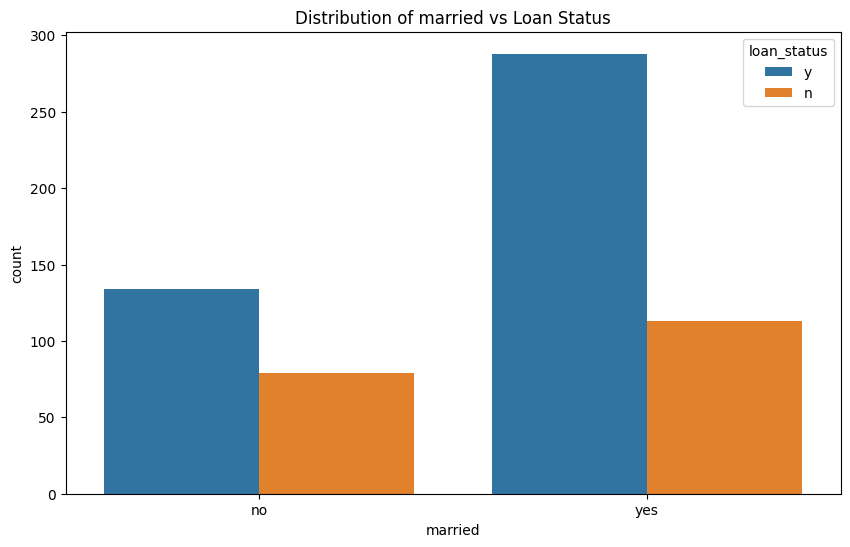

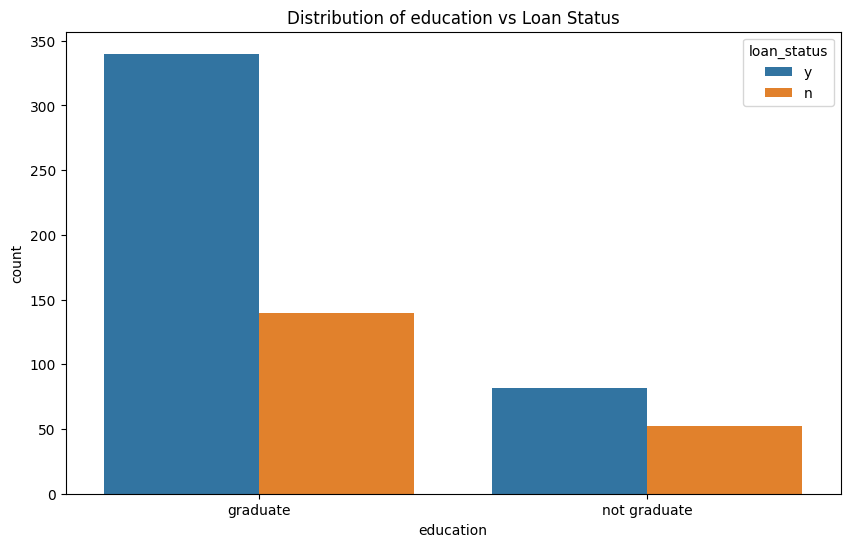

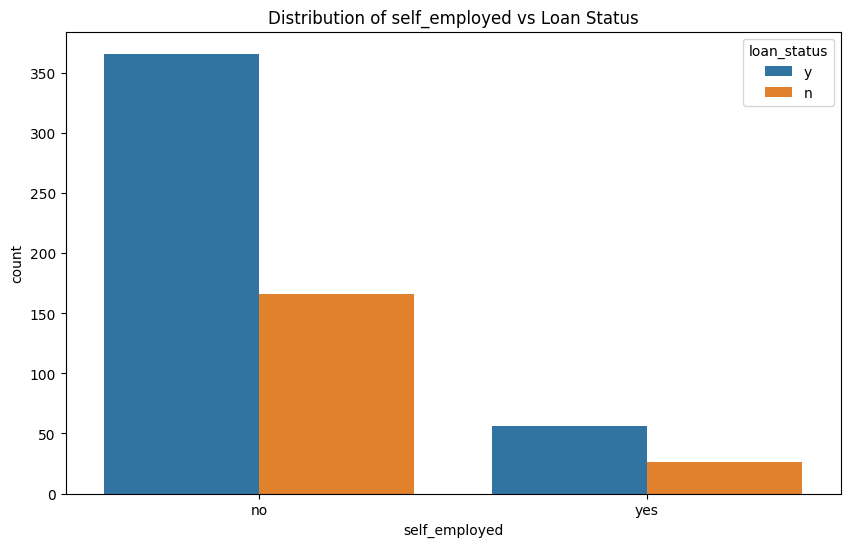

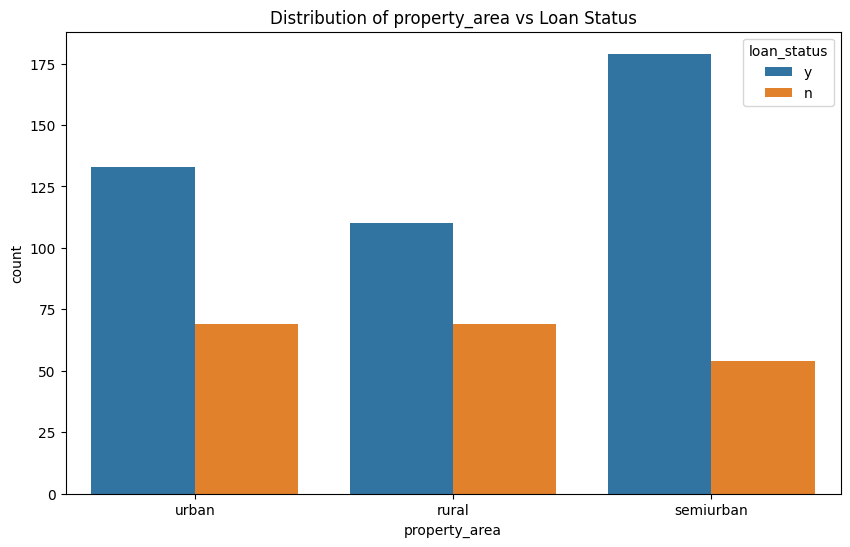

In [38]:
cat_features = ['gender', 'married', 'education', 'self_employed', 'property_area']
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Distribution of {feature} vs Loan Status')
    plt.show()

# 5. Encode categorical data

In [40]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# 6. Separate features and target, split data

In [42]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build and train the model

In [44]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Make predictions and evaluate the model

In [46]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



## Save the model using pickle

In [48]:
with open('loan_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)